In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def load_data(path = "datasets/KP24.txt"):
    with open(path, 'r') as f:
        inputData = f.readlines()
    
    Capacity = int(inputData[0].strip())
    N = int(inputData[1].strip())
    item_list=[]
    for item in inputData[2:]:
        #del '\n' 
        item = item.strip()
        #split by ' '
        item = item.split(' ')
        #(p, w)
        item_list.append((int(item[0]), int(item[1])))

    return Capacity, N, item_list

In [85]:
Capacity, N, item_list = load_data()
print(Capacity)
print(N)
print(item_list)

6404180
24
[(825594, 382745), (1677009, 799601), (1676628, 909247), (1523970, 729069), (943972, 467902), (97426, 44328), (69666, 34610), (1296457, 698150), (1679693, 823460), (1902996, 903959), (1844992, 853665), (1049289, 551830), (1252836, 610856), (1319836, 670702), (953277, 488960), (2067538, 951111), (675367, 323046), (853655, 446298), (1826027, 931161), (65731, 31385), (901489, 496951), (577243, 264724), (466257, 224916), (369261, 169684)]


In [63]:
def Fitness_check(indiv, n = N):
    cost = 0
    weight_total = 0

    for i in range(n):
        cost += indiv[i]*item_list[i][0]
        weight_total += indiv[i]*item_list[i][1]

    res = cost    
    if(weight_total > Capacity):
        res -= 50*(weight_total - Capacity)
    return res

In [64]:
mark = set()

def check_generated(individual):
    hash_val = hash(individual.tobytes())
    pre_size = len(mark)
    mark.add(hash_val)
    if(pre_size < len(mark)): return False
    
    return True

In [65]:
def GeneratorIndivV2(dims=N):
    indiv = []
    w = 0
    cost = 0
    n = 0
    rate = 0.1
    while n < dims:
        if(np.random.random_sample() < rate): indiv.append(1)
        else: indiv.append(0)
        n += 1
    indiv = np.array(indiv)
    cost= Fitness_check(indiv, dims)

    return indiv, cost

In [66]:
def GeneratorIndiv(dims=N):
    indiv = []
    w = 0
    cost = 0
    n = 0
    while n < dims:
        i = np.random.randint(2)
        w += i*item_list[n][1]
        if(w > Capacity): indiv.append(0)
        else: indiv.append(i)
        n += 1
    indiv = np.array(indiv)
    cost= Fitness_check(indiv, dims)

    return indiv, cost

In [67]:
GeneratorIndiv()

(array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 12309331)

In [68]:
import math

best_parents = (0, 0)

def GeneratorPopulaion(sizePop, dims):
    Populaion = []
    for i in range(sizePop):
        pi, f_pi = GeneratorIndiv(dims)
        global best_parents
        if f_pi > best_parents[1]: 
            best_parents = (pi, f_pi)
        mark.add(hash(pi.tobytes()))
        Populaion.append((pi, f_pi))

    return Populaion

In [69]:
import random

def GeneratorPopulaionV2(sizePop, dims):
    Populaion = []
    for i in range(int(sizePop/2)):
        pi1, f_pi1 = GeneratorIndiv(dims)
        pi2, f_pi2 = GeneratorIndivV2(dims)
        global best_parents
        if f_pi1 > best_parents[1]: 
            best_parents = (pi1, f_pi1)
        mark.add(hash(pi1.tobytes()))
        Populaion.append((pi1, f_pi1))
        if f_pi2 > best_parents[1]: 
            best_parents = (pi2, f_pi2)
        mark.add(hash(pi2.tobytes()))
        Populaion.append((pi2, f_pi2))
    
    random.shuffle(Populaion)

    return Populaion

In [70]:
GeneratorPopulaionV2(10, N)

[(array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
         1, 0]),
  10566828),
 (array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
         0, 1]),
  8895013),
 (array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0]),
  6320098),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
  0),
 (array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
         0, 0]),
  9422259),
 (array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 0]),
  11394780),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         1, 0]),
  3992206),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
  953277),
 (array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
  12788151),
 (array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
def chooseParents(pop):
    n = len(pop)
    index1 = np.random.randint(n)
    while True:
        index2 = np.random.randint(n)
        if index1 == index2: break
    index3 = np.random.randint(n)
    while True:
        index4 = np.random.randint(n)
        if index3 == index4: break
    
    if pop[index1][1] > pop[index2][1]:
        p1 = pop[index1][0]
    else:
        p1 = pop[index2][0]
    
    if pop[index3][1] > pop[index4][1]:
        p2 = pop[index3][0]
    else:
        p2 = pop[index4][0]
    
    return p1, p2

In [72]:
def cross_TwoPoint(p1, p2):
    n = len(p1)
    cross = int(n*0.2)

    index1 = np.random.randint(1, n-cross)
    index2 = index1 + cross
    while index1 == index2:
       index2 = np.random.randint(1, n-1)
   
    if index1 > index2:
        temp = index1
        index1 = index2
        index2 = temp

    o1 = np.array(p1)
    o2 = np.array(p2)

    for i in range(index1, index2+1):
        o1[i] = p2[i]
        o2[i] = p1[i]

    return o1, o2

In [73]:
cross_TwoPoint([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

(array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]))

In [74]:
def mutation_xor(individual):
    n = len(individual)
    res = np.array(individual)

    index1 = np.random.randint(n)
    res[index1] = (res[index1] + 1)%2

    return res

In [75]:
mutation_xor([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [76]:
import random

def selection(pre_pop, offs_pop, rate_sel = 0.2):  
    n = len(pre_pop)
    n_p = int(n*rate_sel)
    n_o = int(n*(0.5 - rate_sel))
    pre_pop.sort(key=lambda tup: tup[1], reverse = True)
    offs_pop.sort(key=lambda tup: tup[1], reverse = True)
    pop = pre_pop[n_p:] + offs_pop[n_o:]
    pop.sort(key=lambda tup: tup[1], reverse = True)
    next_pop = pre_pop[0:n_p] + offs_pop[0:n_o] + pop[0:(n-n_p-n_o)]
    random.shuffle(next_pop)
    return next_pop

In [77]:
from copy import deepcopy
#start_population = GeneratorPopulaion(size_pop, num_cities)
def GA(size_pop, num_gens, Pc, Pm):
    
    population = GeneratorPopulaion(size_pop, N)
    res = deepcopy(best_parents)
    best_offs = (0, 0)
    logg = []

    t = 0
    while t < num_gens:
        offs_pop = []
        while len(offs_pop) < size_pop:
            p1, p2 = chooseParents(population)

            rand = np.random.random_sample()
            o1, o2 = [], []
            if rand <= Pc:
                o1, o2 = cross_TwoPoint(p1, p2)
            else:
                o1 = mutation_xor(p1)
                o2 = mutation_xor(p2)
            if np.random.random_sample() < Pm:
                o1 = mutation_xor(o1)
                o2 = mutation_xor(o2)
            if not check_generated(o1):
            #if True:
                f_o1 = Fitness_check(o1)
                if(f_o1 > best_offs[1]): best_offs = (o1, f_o1)
                offs_pop.append((o1, f_o1))
            if not check_generated(o2):
            #if True:
                f_o2 = Fitness_check(o2)
                if(f_o2 > best_offs[1]): best_offs = (o2, f_o2)
                offs_pop.append((o2, f_o2))
        
        population = selection(population, offs_pop)
        if res[1] < best_offs[1]: res = best_offs
        logg.append([t, res])
        t+= 1
    
    return logg, population

In [78]:
def show(his):
    input = np.array(his, dtype=object)
    x = input[:, 0]
    y = np.array(input[:, 1])
    y = [i[1] for i in y]
    plt.plot(x, y)
    plt.title('GA')
    plt.show()

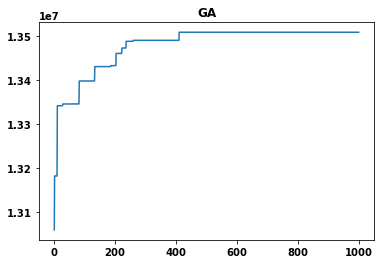

(array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1]), 13509694)


In [83]:
history, pop = GA(20, 1000, 0.75, 0.1)
show(history)
print(history[-1][1])

In [80]:
def check(indiv, n = N):
    cost = 0
    weight_total = 0

    for i in range(n):
        cost += indiv[i]*item_list[i][0]
        weight_total += indiv[i]*item_list[i][1]

    return (weight_total, cost)

In [81]:
# check([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
#        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
#        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
#        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])